In [1]:
library(dplyr)
library(reshape2)
library(ggplot2)
library(ktplots)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid')

In [3]:
bcells <- read.csv('h5ad/combined_dec_bcells_obs.csv', header= TRUE, row.names = 1)
head(bcells)

,sample_id,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,initial_clustering,Resample,Collection_Day,⋯,filter_bcr_quality,filter_bcr_heavy,filter_bcr_light,bcr_QC_pass,filter_bcr,initial_clustering_B,leiden_B,leiden_B2,celltype_B,celltype_B_v2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>
BGCV01_AAACCTGAGATGCGAC-1,BGCV01_CV0904,1986,1986,10695,499,4.665731,11,B_cell,Initial,D0,⋯,False,False,True,False,True,B_cell,4,"4,1",B_non-switched_memory,B_non-switched_memory
BGCV01_AAACCTGAGGGCATGT-1,BGCV01_CV0902,982,982,3053,148,4.847691,23,B_cell,Initial,D0,⋯,False,False,True,False,True,B_cell,0,0,B_naive,B_naive
BGCV01_AAACCTGCATAAAGGT-1,BGCV01_CV0904,1148,1148,3882,260,6.697579,23,B_cell,Initial,D0,⋯,False,False,True,False,True,B_cell,7,7,B_naive,B_naive
BGCV01_AAACCTGGTAGTACCT-1,BGCV01_CV0904,1246,1246,4421,187,4.229812,5,B_cell,Initial,D0,⋯,False,False,True,False,True,B_cell,0,0,B_naive,B_naive
BGCV01_AAACGGGGTCACAAGG-1,BGCV01_CV0904,1277,1277,4003,215,5.370972,23,B_cell,Initial,D0,⋯,False,False,False,True,False,B_cell,1,1,B_naive,B_naive
BGCV01_AAACGGGTCCGTCAAA-1,BGCV01_CV0904,1255,1255,5014,150,2.991623,11,B_cell,Initial,D0,⋯,False,False,False,True,False,B_cell,2,2,B_naive,B_naive


In [4]:
df<- bcells %>%
  group_by(patient_id, Status_on_day_collection_summary, celltype_B) %>%
  summarise(total = n())%>%
  mutate(freq = total / sum(total))

colnames(df)<-c("patient_id", "diagnosis","celltype", "total", "freq")

`summarise()` regrouping output by 'patient_id', 'Status_on_day_collection_summary' (override with `.groups` argument)



In [5]:
df<-df %>% group_by(diagnosis, celltype) %>% summarise(mean = mean(freq))

`summarise()` regrouping output by 'diagnosis' (override with `.groups` argument)



In [6]:
df$diagnosis <- factor(df$diagnosis, levels = c("Healthy", "Asymptomatic", "Mild", "Moderate", "Severe", "Critical", "Non_covid", "LPS"))
df$celltype <- factor(df$celltype, levels = rev(c("B_immature", "B_naive", "B_non-switched_memory","B_switched_memory", "B_exhausted", 'Plasmablast', 'Plasma_cell_IgM', 'Plasma_cell_IgA', 'Plasma_cell_IgG')))

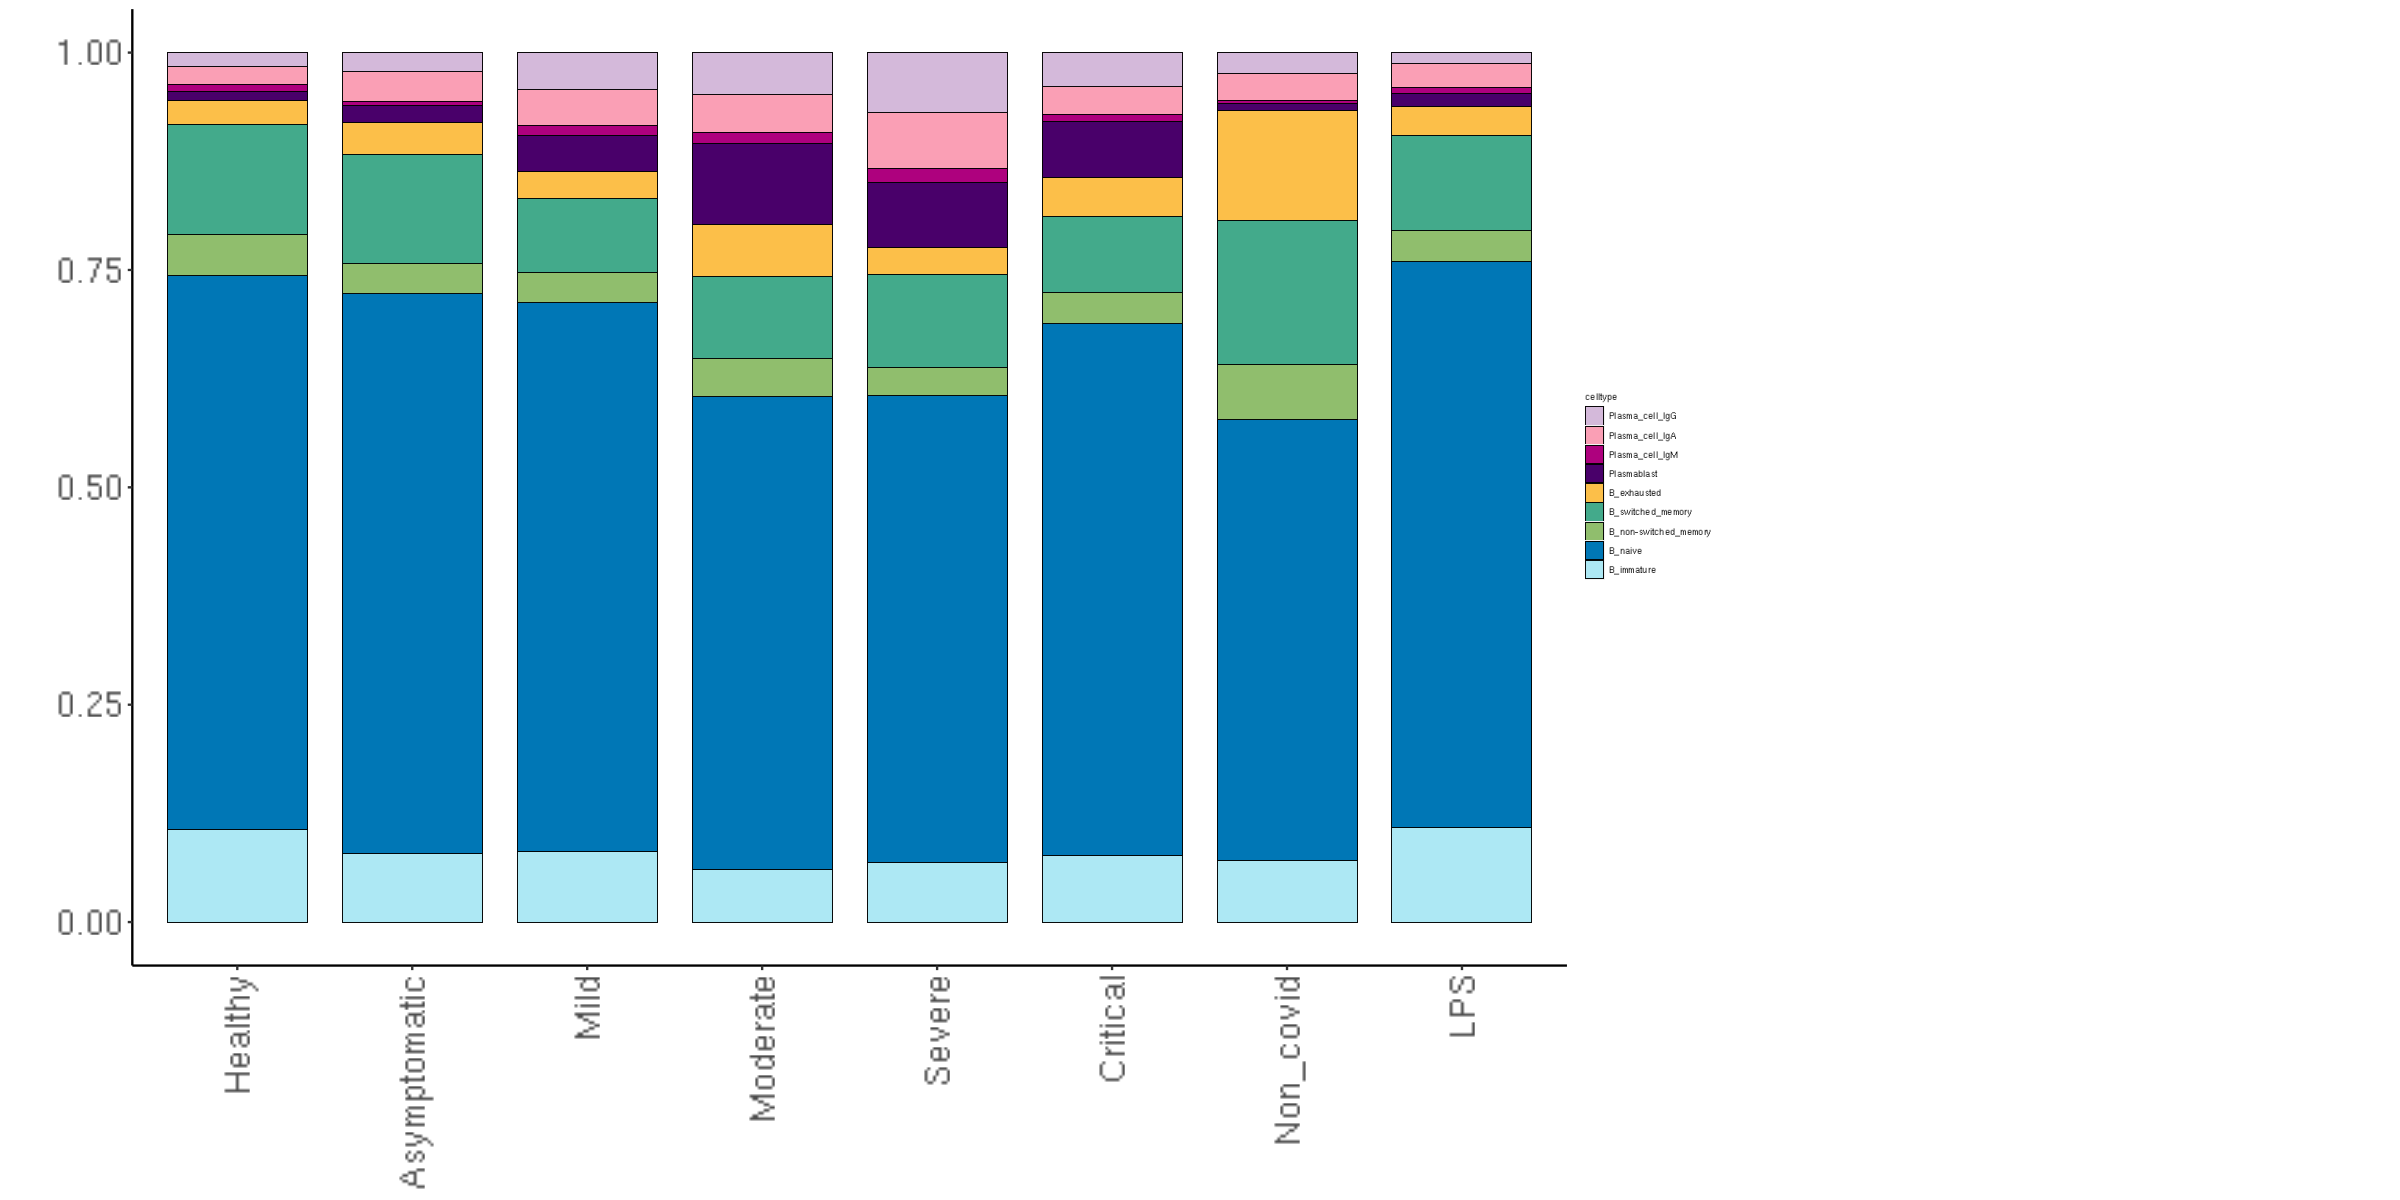

In [7]:
options(repr.plot.width=20, repr.plot.height=10)
g <- ggplot(df, aes(x=diagnosis, y = mean, fill=celltype))+ 
    geom_bar(position="fill", stat="identity", width = 0.8, colour = "black", size=0.2)+
      theme(aspect.ratio = 2/3)+ 
      theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 20)) +
theme(axis.text.y = element_text(size = 20)) +
theme(axis.title.x=element_blank(), axis.title.y=element_blank())+
theme(legend.text = element_text(size = 20)) +
scale_fill_manual(values = rev(c('#ade8f4', '#0077b6', '#90be6d', '#43aa8b', '#fcbf49', '#49006a','#ae017e', '#fa9fb5', '#d4b9da')))+ 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black")) + small_legend(keysize = .8)
g

In [8]:
df <- bcells %>% 
  group_by(patient_id, Status_on_day_collection_summary, celltype_B) %>%
  summarise(total = n()) %>% mutate(freq = total / sum(total))
df

`summarise()` regrouping output by 'patient_id', 'Status_on_day_collection_summary' (override with `.groups` argument)



patient_id,Status_on_day_collection_summary,celltype_B,total,freq
<fct>,<fct>,<fct>,<int>,<dbl>
AP1,Severe,B_exhausted,3,0.013953488
AP1,Severe,B_immature,10,0.046511628
AP1,Severe,B_naive,101,0.469767442
AP1,Severe,B_non-switched_memory,8,0.037209302
AP1,Severe,B_switched_memory,26,0.120930233
AP1,Severe,Plasma_cell_IgA,25,0.116279070
AP1,Severe,Plasma_cell_IgG,27,0.125581395
AP1,Severe,Plasma_cell_IgM,10,0.046511628
AP1,Severe,Plasmablast,5,0.023255814


In [9]:
write.csv(df, 'other_analyses/all_B_cell_proportions.csv')

In [10]:
kelvinny::dirCreate('figures/barcharts')
ggsave('figures/barcharts/bcell_prop.pdf', plot = g, h = 7, w = 7)

In [11]:
## for isotypes
bcells <- read.csv('h5ad/combined_dec_bcells_obs_vdj.csv', header= TRUE, row.names = 1)
df <- bcells %>% filter(celltype_B_v2 %in% c('Plasmablast', 'Plasma_cell')) %>% filter(isotype %in% c('IgM', 'IgD', 'IgA', 'IgE', 'IgG'))  %>%
  group_by(patient_id, Status_on_day_collection_summary, isotype) %>%
  summarise(total = n())%>%
  mutate(freq = total / sum(total))

colnames(df)<-c("patient_id", "diagnosis","isotype", "total", "freq")

`summarise()` regrouping output by 'patient_id', 'Status_on_day_collection_summary' (override with `.groups` argument)



In [12]:
df<-df %>% group_by(diagnosis, isotype) %>% summarise(mean = mean(freq))

`summarise()` regrouping output by 'diagnosis' (override with `.groups` argument)



In [13]:
df$diagnosis <- factor(df$diagnosis, levels = c("Healthy", "Asymptomatic", "Mild", "Moderate", "Severe", "Critical", "Non_covid", "LPS"))
df$isotype <- factor(df$isotype, levels = rev(c('IgM', 'IgD', 'IgA', 'IgE', 'IgG')))

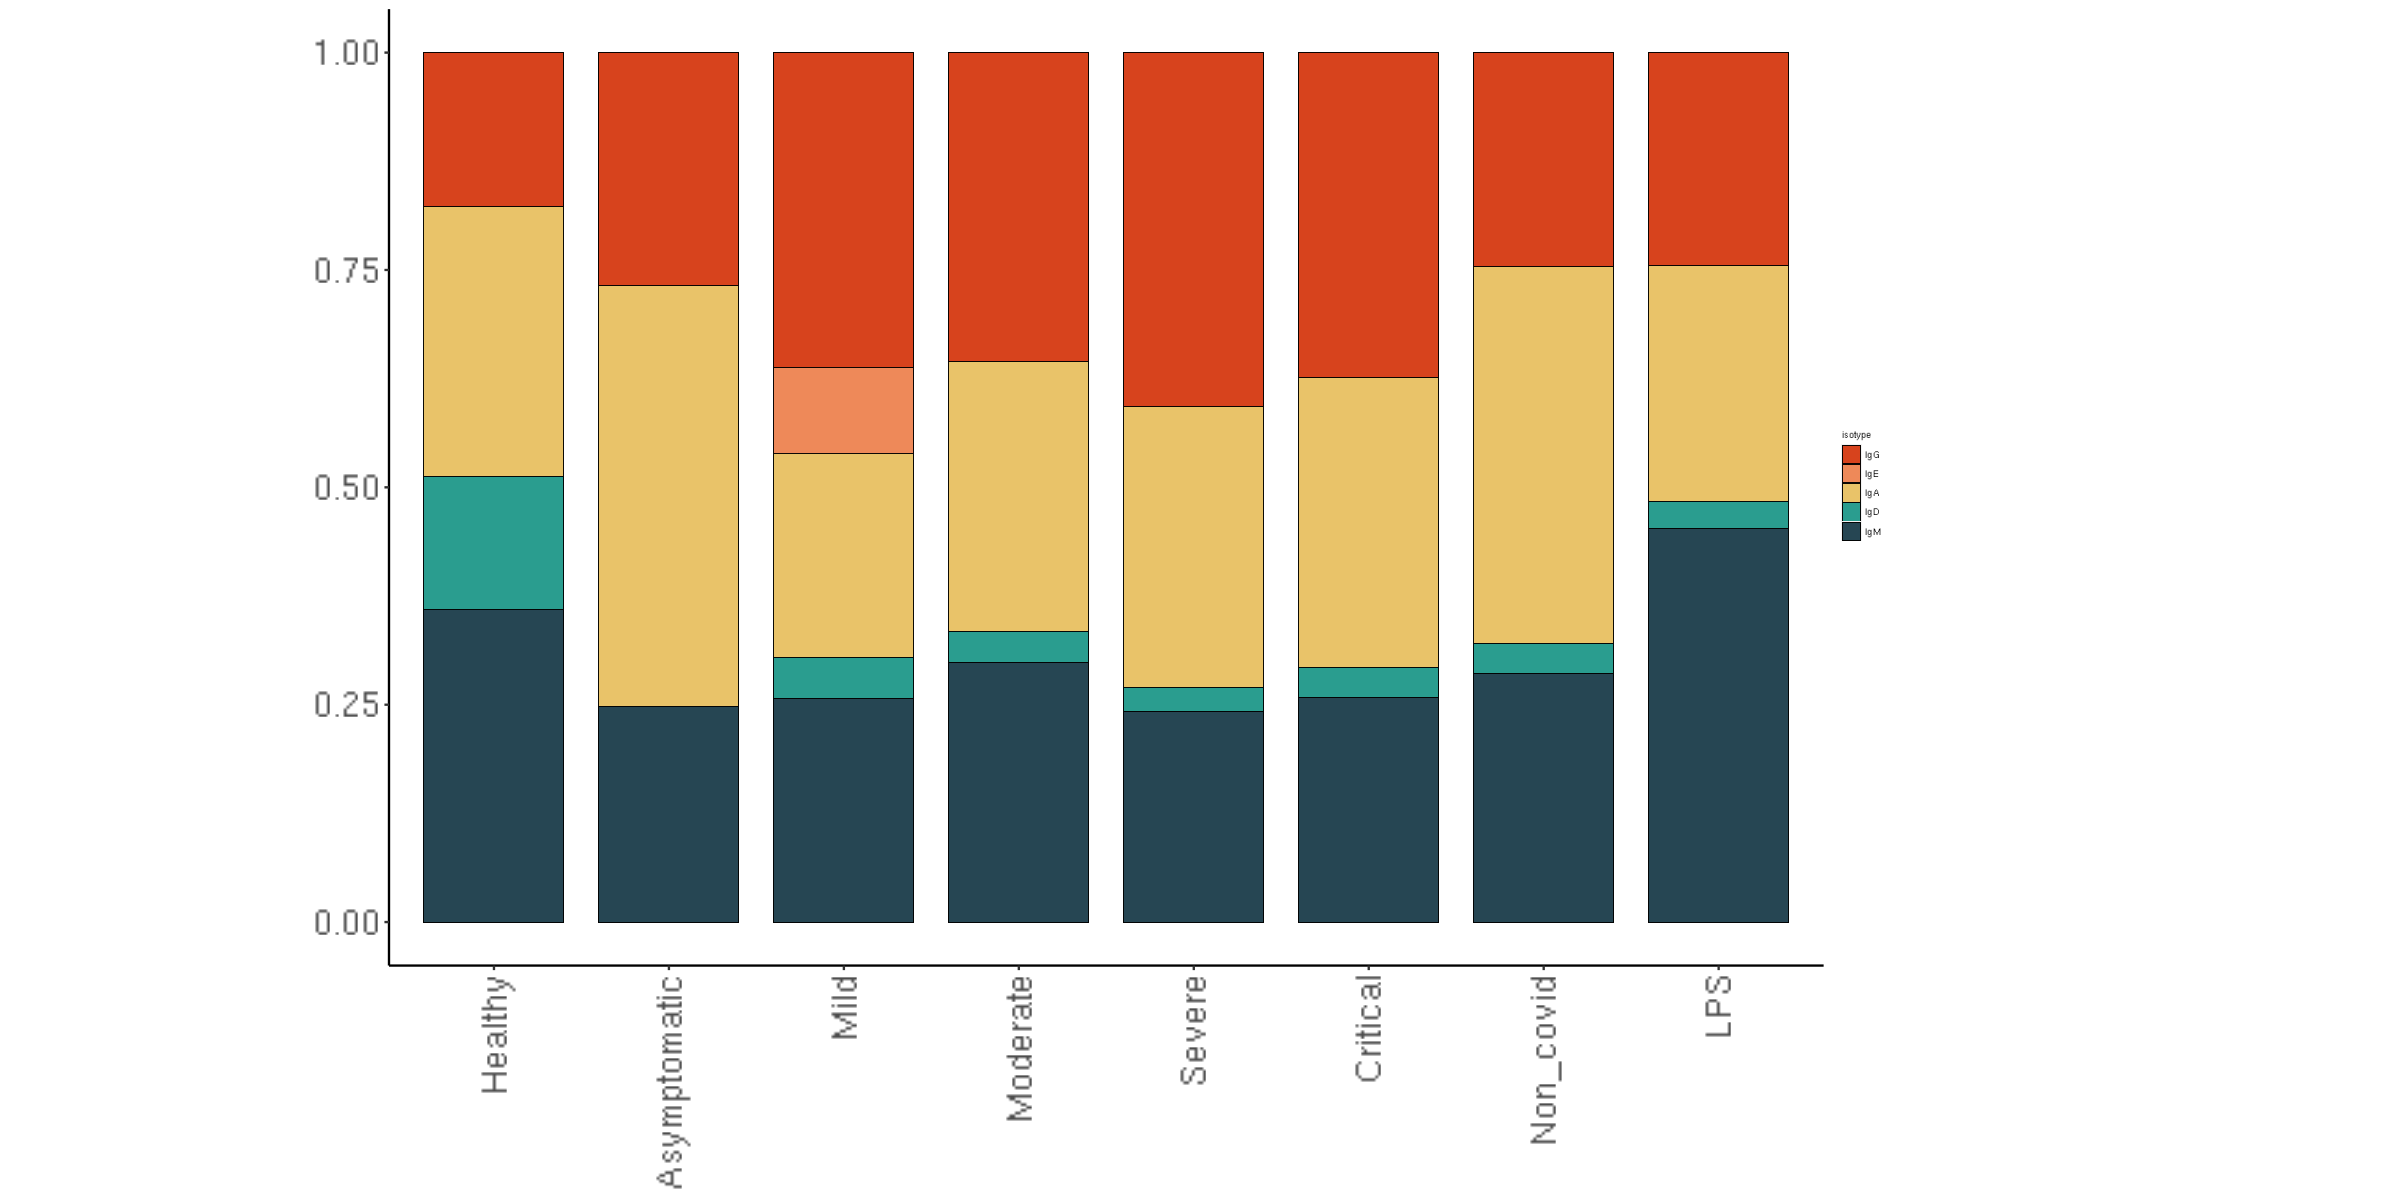

In [14]:
options(repr.plot.width=20, repr.plot.height=10)
g <- ggplot(df, aes(x=diagnosis, y = mean, fill=isotype))+ 
    geom_bar(position="fill", stat="identity", width = 0.8, colour = "black", size=0.2)+
      theme(aspect.ratio = 2/3)+ 
      theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 20)) +
theme(axis.text.y = element_text(size = 20)) +
theme(axis.title.x=element_blank(), axis.title.y=element_blank())+
theme(legend.text = element_text(size = 20)) +
scale_fill_manual(values = rev(c('#264653', '#2A9D8F', '#E9C369', '#EE8959', '#D7431D')))+ 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black")) + small_legend(keysize = .8)
g

In [15]:
ggsave('figures/barcharts/plasmacell_isotype_prop.pdf', plot = g, h = 7, w = 4)

In [16]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/R/lib/libRblas.so

locale:
[1] en_GB.utf8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ktplots_1.1.7  ggplot2_3.3.2  reshape2_1.4.4 dplyr_1.0.0   

loaded via a namespace (and not attached):
 [1] bitops_1.0-6                matrixStats_0.57.0         
 [3] fs_1.5.0                    doMC_1.3.7                 
 [5] usethis_1.6.3               devtools_2.3.2             
 [7] RColorBrewer_1.1-2          rprojroot_1.3-2            
 [9] GenomeInfoDb_1.22.1         repr_1.1.0                 
[11] tools_3.6.1                 backports_1.2.0            
[13] R6_2.5.0                    BiocGenerics_0.32.0        
[15] colorspace_1.4-1            withr_2.3.0                
[17] tidyselect_1.1.0            gri